# PC Test Environ Maker

In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle

Here I declare the node graph used for the experiments. In this case it is 4 normal nodes and one malicious node.

In [2]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng, 1)
for n in range(4):
    ng.new_node()

ng.new_node(mal=True, watch=w)

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001FFB76B23F0>]
Edges []
Node IDS [0]
Weights [[0, 378, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001FFB76B23F0>, <tangle.node object at 0x000001FFB7426CC0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 378, 1], [1, 1242, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001FFB76B23F0>, <tangle.node object at 0x000001FFB7426CC0>, <tangle.node object at 0x000001FFB7160950>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 378, 1], [1, 1242, 1], [2, 782, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001FFB76B23F0>, <tangle.node object at 0x000001FFB7426CC0>, <tangle.node object at 0x000001FFB7160950>, <tangle.node object at 0x000001FFB75A6ED0>]
Edges [(1, 0), (2, 1), (2, 0), (3, 1), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 378, 1], [1, 1242, 1], [2, 782, 1], [3, 1879, 1]]
Finished up

Next I design the transactions in the series. As this is a low load tangle I add a wait time based on the rate of the tangle (in this case 3) to ensure the rate of transactions (and therefore confirmations) is slower. The simulation is then ran for a minute. The output will be recorded in csv files and output.

In [2]:
for trial in range(1,10):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.update()
    ng.nodes[-1].spam_transactions(10)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()



First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F24EABD700>]
Edges []
Node IDS [0]
Weights [[0, 96, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F24EABD700>, <tangle.node object at 0x000001F24E88D4C0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 96, 1], [1, 446, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F24EABD700>, <tangle.node object at 0x000001F24E88D4C0>, <tangle.node object at 0x000001F24E1E8C80>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 96, 1], [1, 446, 1], [2, 664, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F24EABD700>, <tangle.node object at 0x000001F24E88D4C0>, <tangle.node object at 0x000001F24E1E8C80>, <tangle.node object at 0x000001F24E1E8B60>]
Edges [(1, 0), (2, 1), (2, 0), (3, 0), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 96, 1], [1, 446, 1], [2, 664, 1], [3, 1153, 1]]
Finished updating


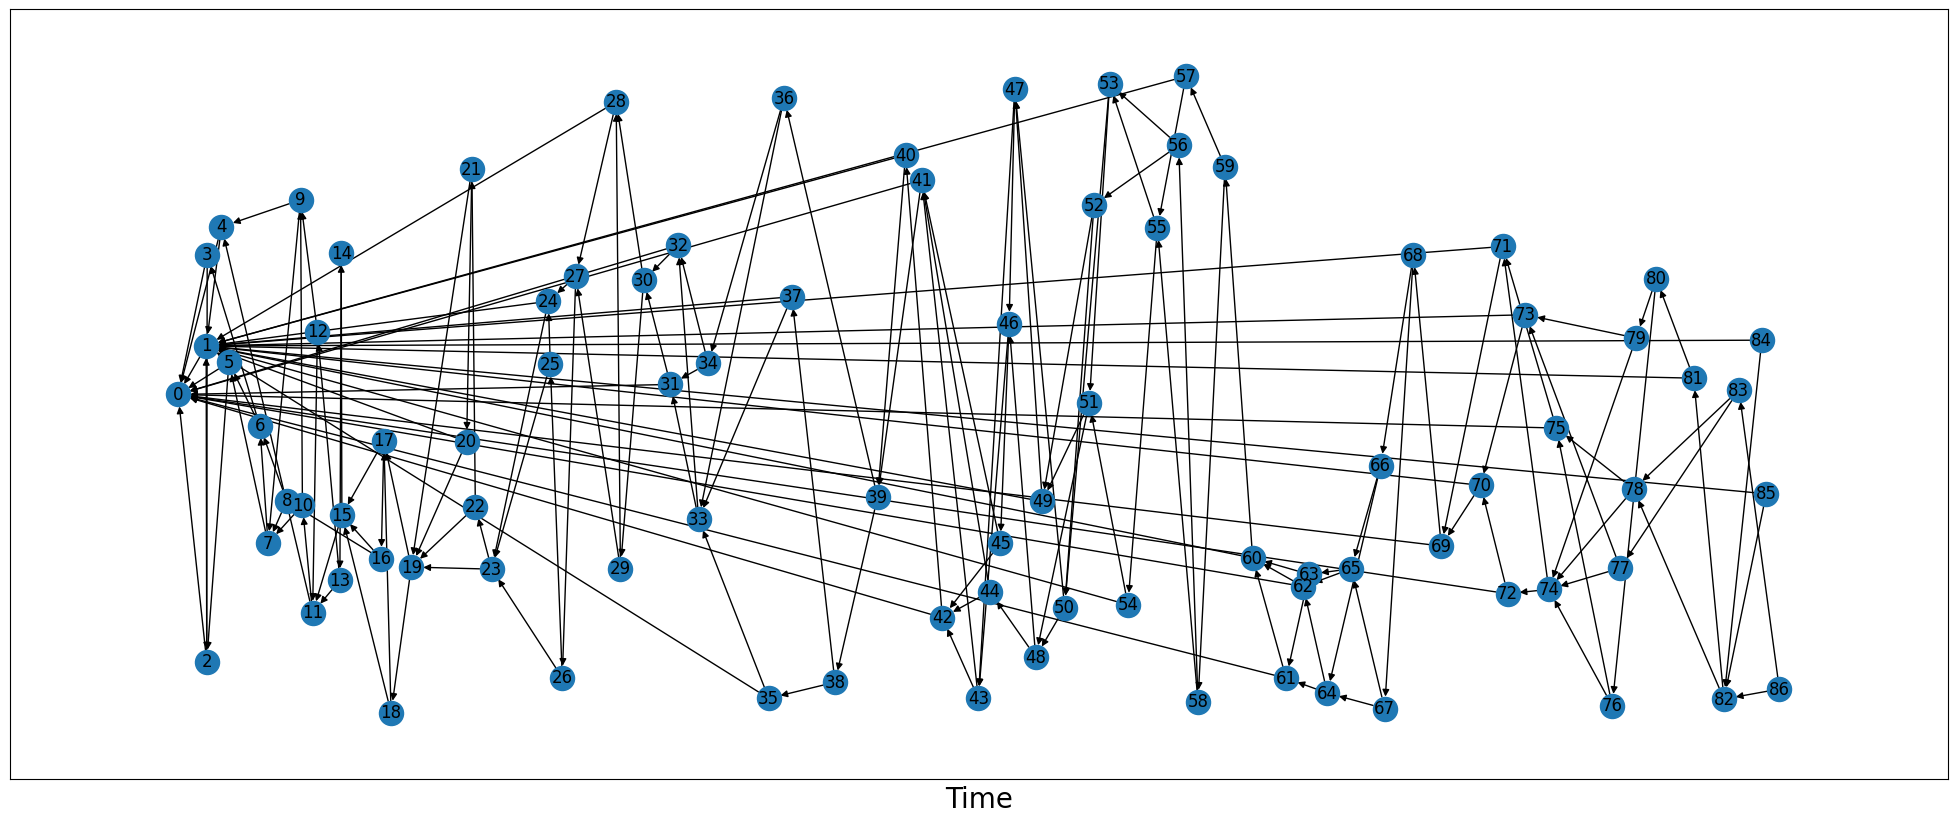

In [4]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 6, 6, 7, 11, 12, 12, 14, 14, 16, 17, 17, 19, 19, 19, 22, 22, 22, 25, 26, 27, 27, 28, 28, 28, 28, 29, 34, 34, 34, 34, 34, 35, 37, 39, 41, 42, 42, 43, 45, 45, 46, 48, 48, 50, 50, 53, 53, 53, 55, 55, 57, 59, 62, 62, 62, 63, 65, 66, 67, 67, 67, 70, 71, 71, 71, 71, 74, 74, 74, 74, 74, 77, 78, 78, 79, 80, 81, 82, 82, 85, 86, 88, 91] [1.0, 1.575003908992376, 1.8779339443477903, 2.105891892208869, 2.1870849777850605, 2.2022428476012488, 2.6459269172386994, 2.924987839579586, 3.2753612153386094, 4.161234806824831, 4.762460629886689, 4.762656331288432, 5.812339593164786, 6.093177626833202, 6.269861538595619, 6.726663517413794, 7.334760735628725, 7.3402218384352205, 8.111434468824656, 8.128541840963093, 8.382163369729161, 8.653683362911114, 9.333576306189832, 9.630221825603542, 10.186007850423477, 11.477664369555088, 11.726661291686092, 12.07361279543395, 13.416379730723115, 13.897897769156344, 13.918008499214196, 16.172685172393034, 16.800783076199597, 

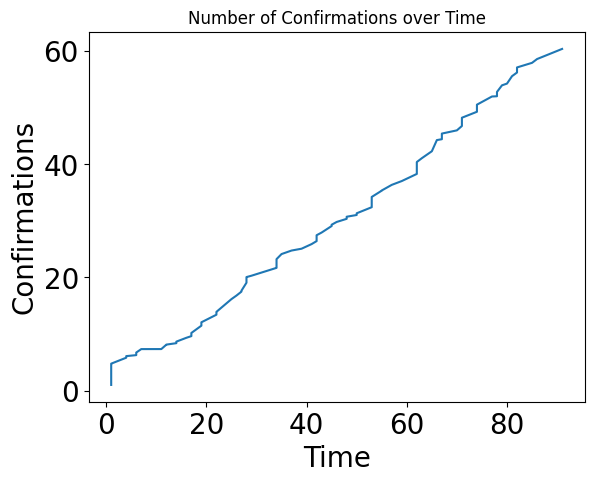

In [6]:
w.plot_confirm_over_time()
print(PC_issue_time)

In [3]:
a = analyser()
results = a.get_res(9)

[[1.0, 0.12740850970017636, 9], [1.2, 1.0, 2], [1.4, 1, 1], [1.5, 1, 1], [1.6, 0.21388888888888888, 6], [1.7, 0.6666666666666666, 3], [1.8, 1.0, 2], [1.9, 1.0, 2], [2.0, 0.21388888888888888, 6], [2.1, 0.6666666666666666, 3], [2.2, 0.2833333333333333, 5], [2.3, 0.41666666666666663, 4], [2.4, 0.41666666666666663, 4], [2.5, 0.6666666666666666, 3], [2.6, 0.1734126984126984, 7], [2.7, 1.0, 2], [2.8, 0.41666666666666663, 4], [2.9, 0.41666666666666663, 4], [3.0, 1, 1], [3.1, 0.6666666666666666, 3], [3.2, 0.41666666666666663, 4], [3.3, 0.5, 4], [3.4, 0.6666666666666666, 3], [3.5, 0.45833333333333337, 4], [3.6, 2.0, 2], [3.8, 0.5833333333333333, 4], [3.9, 1, 1], [4.0, 0.41666666666666663, 4], [4.1, 2.0, 2], [4.2, 0.33333333333333337, 5], [4.3, 4, 1], [4.4, 1, 1], [4.5, 1.0, 2], [4.7, 2.0, 2], [4.8, 0.45833333333333337, 4], [4.9, 2, 1], [5.0, 1, 1], [5.1, 2.8333333333333335, 3], [5.2, 2.6666666666666665, 3], [5.3, 0.8333333333333333, 4], [5.4, 0.7944444444444444, 6], [5.5, 2.1666666666666665, 3]

In [4]:
import pandas as pd

[[1.0, 0.12740850970017636, 9], [1.2, 1.0, 2], [1.4, 1, 1], [1.5, 1, 1], [1.6, 0.21388888888888888, 6], [1.7, 0.6666666666666666, 3], [1.8, 1.0, 2], [1.9, 1.0, 2], [2.0, 0.21388888888888888, 6], [2.1, 0.6666666666666666, 3], [2.2, 0.2833333333333333, 5], [2.3, 0.41666666666666663, 4], [2.4, 0.41666666666666663, 4], [2.5, 0.6666666666666666, 3], [2.6, 0.1734126984126984, 7], [2.7, 1.0, 2], [2.8, 0.41666666666666663, 4], [2.9, 0.41666666666666663, 4], [3.0, 1, 1], [3.1, 0.6666666666666666, 3], [3.2, 0.41666666666666663, 4], [3.3, 0.5, 4], [3.4, 0.6666666666666666, 3], [3.5, 0.45833333333333337, 4], [3.6, 2.0, 2], [3.8, 0.5833333333333333, 4], [3.9, 1, 1], [4.0, 0.41666666666666663, 4], [4.1, 2.0, 2], [4.2, 0.33333333333333337, 5], [4.3, 4, 1], [4.4, 1, 1], [4.5, 1.0, 2], [4.7, 2.0, 2], [4.8, 0.45833333333333337, 4], [4.9, 2, 1], [5.0, 1, 1], [5.1, 2.8333333333333335, 3], [5.2, 2.6666666666666665, 3], [5.3, 0.8333333333333333, 4], [5.4, 0.7944444444444444, 6], [5.5, 2.1666666666666665, 3]

Text(0, 0.5, 'Confirmations')

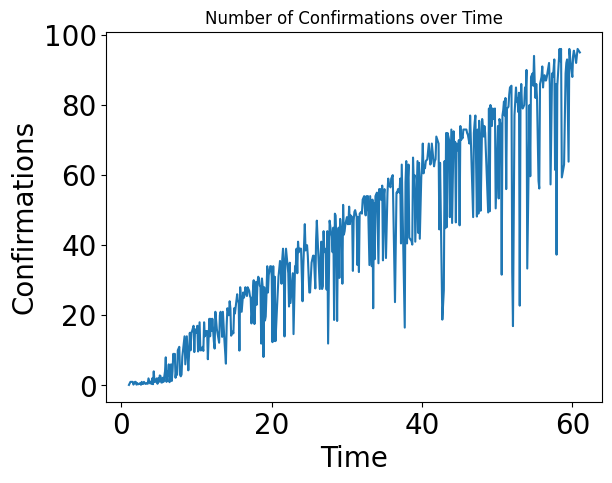

In [10]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

### Non-PC Tangle

In [7]:
t2 = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng2 = node_graph(t2)
w2 = watcher(t2, ng2, 2)

for n in range(4):
    ng2.new_node()


for j in range(9):
    for i in range(4):
        ng2.nodes[i].issue_transaction()
        w2.update()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001FFB7767CE0>]
Edges []
Node IDS [0]
Weights [[0, 903, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001FFB7767CE0>, <tangle.node object at 0x000001FFB9E34920>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 903, 1], [1, 1003, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001FFB7767CE0>, <tangle.node object at 0x000001FFB9E34920>, <tangle.node object at 0x000001FFB9E37170>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 903, 1], [1, 1003, 1], [2, 725, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001FFB7767CE0>, <tangle.node object at 0x000001FFB9E34920>, <tangle.node object at 0x000001FFB9E37170>, <tangle.node object at 0x000001FFB9E36780>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 903, 1], [1, 1003, 1], [2, 725, 1], [3, 23, 1]]
------------


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 8, 9, 9, 9, 10, 11, 11, 11, 11, 15, 15, 15, 16, 17, 17, 18, 18, 18, 18, 23, 25, 25] [1.0, 1.772236120182186, 1.8100473534520947, 1.8978828416666373, 1.9634204538155853, 3.0470159348421806, 3.767780618578707, 4.672307572609916, 5.3001385541015225, 5.366165927900147, 6.001368308280835, 6.0114216383053645, 6.506080225213505, 6.774229870497052, 6.807387361341148, 8.146007046849167, 8.73178503880387, 8.77444000907536, 9.207773546709463, 9.567653604127123, 9.986182973052163, 10.043184137986444, 10.047624528733259, 10.797987477728306, 11.08864653033551, 11.376684885843563, 11.762794954143365, 12.157739958226989, 12.87981502329782, 13.547192095571626, 13.646975626553383, 13.679300339183415, 13.79993030152623, 14.287938624836006, 14.691185990383643, 15.080303151219615, 15.260648663842632]


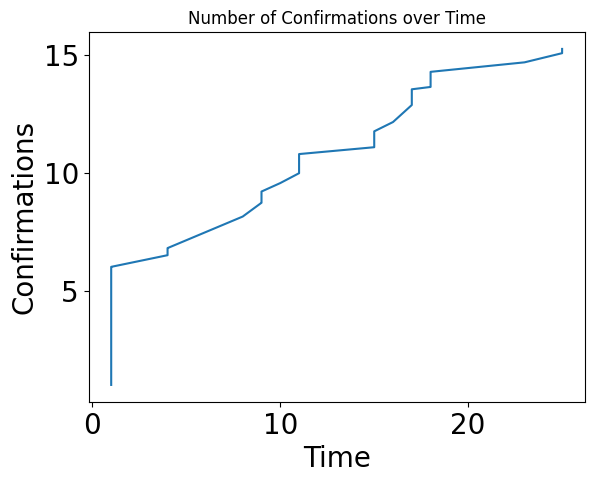

In [8]:
w2.plot_confirm_over_time()